# Motorcycle Road Collision Data Synthesis  (PDA Project 2019)

## Index

[Investigate the Weather data](#Investigate-the-Weather-data)


[Synthesizing the weather data](#Synthesizing-the-weather-data)

[Using the sythesized data to model occurences of motorcycle collisions](#Using-the-sythesized-data-to-model-occurences-of-motorcycle-collisions)

[References](#References)


For this project I will synthesize some weather data and motorcycle collision data.

## Investigate the Weather data
Before synthesising  the mototrcycle data, I will simulate a weather dataset, sourced from Met Eireann  [[1]](#References). This dataset will be investigated and then simulated.

In [1]:
import numpy as np
# Import pandas and load the dataset
import pandas as pd
df = pd.read_csv('mly3723.csv',skiprows=18) # read in the csv and skip the non-data explanatory rows.

The Met Eireann dataset contains the following variables :

year - year of the measurement

month - month of the measurement

rain - Precipitation Amount (mm)

meant - Mean Air Temperature (C)

maxtp - Maximum Air Temperature (C)

mintp - Minimum Air Temperature (C)

mnmax - Mean Maximum Temperature (C)

mnmin - Mean Minimum Temperature (C)

gmin - Grass Minimum Temperature (C)

wdsp - Mean Wind Speed (knot)

mxgt - Highest Gust (knot)

sun - Sunshine duration (hours)


In [2]:
df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,sun
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1991.210526,6.473684,9.466617,18.221203,-0.366165,13.234586,5.701504,61.773835,-3.856842,113.964662
std,16.010658,3.457093,3.915470,4.763040,4.318500,4.452386,3.459947,33.833433,4.528277,52.220373
min,1964.000000,1.000000,-0.500000,5.400000,-15.700000,3.300000,-4.200000,1.700000,-17.100000,22.100000
25%,1977.000000,3.000000,6.100000,13.900000,-3.700000,9.400000,2.800000,37.100000,-7.400000,67.900000
50%,1991.000000,6.000000,8.700000,18.100000,-0.900000,12.800000,5.200000,56.800000,-4.200000,110.900000
75%,2005.000000,9.000000,13.100000,22.400000,3.300000,17.200000,8.800000,79.500000,-0.200000,151.100000
max,2019.000000,12.000000,17.800000,31.000000,9.500000,23.500000,12.900000,206.300000,8.200000,256.500000


In [3]:
df.head(10)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1964,1,5.5,10.9,-3.3,8.2,2.9,18.1,-7.8,,,38.9
1,1964,2,5.0,13.3,-6.7,7.9,2.2,22.4,-11.1,,,87.7
2,1964,3,5.1,13.0,-3.2,8.6,1.6,64.1,-7.4,,,74.9
3,1964,4,8.2,16.2,-2.4,12.2,4.2,49.5,-7.3,,,148.0
4,1964,5,11.7,21.3,2.9,16.2,7.2,42.8,0.4,,,195.3
5,1964,6,12.8,22.9,2.9,16.8,8.8,46.7,-1.0,,,136.6
6,1964,7,14.9,23.3,3.6,19.1,10.7,31.5,-1.7,,,150.6
7,1964,8,14.1,23.1,1.5,18.5,9.6,78.7,-2.6,,,176.1
8,1964,9,13.2,21.6,1.9,17.6,8.9,44.5,-1.4,,,159.7
9,1964,10,8.7,17.3,-0.9,12.5,4.9,72.4,-3.4,,,89.3


The dataset begins in 1964.

In [4]:
df.tail(10)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
655,2018,8,15.6,25.4,6.0,20.1,11.1,43.3,0.8,9.3,33,135.9
656,2018,9,12.3,24.0,0.7,16.8,7.9,37.0,-3.1,10.0,56,136.8
657,2018,10,9.2,19.7,-4.3,13.4,5.1,56.0,-9.2,9.4,51,127.0
658,2018,11,8.3,15.0,-0.8,10.8,5.8,104.6,-5.0,10.7,62,62.3
659,2018,12,7.9,13.0,0.0,10.1,5.8,88.9,-3.0,11.3,52,22.1
660,2019,1,5.2,10.9,-3.0,7.6,2.7,33.1,-9.2,9.4,42,40.3
661,2019,2,7.2,17.2,-4.1,11.3,3.2,22.2,-7.8,12.0,54,117.0
662,2019,3,7.1,16.9,-2.8,11.3,2.9,86.2,-5.7,12.5,49,130.3
663,2019,4,8.4,21.6,-1.7,12.4,4.4,69.1,-4.5,8.3,48,120.3
664,2019,5,10.9,21.1,-1.3,15.5,6.3,26.8,-4.0,7.1,33,161.3


and ends in 2019.

In [5]:
# Check for missing data
df.isna().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [6]:
# Check for missing data
df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

I will add a datetime index to the dataset, so I can slice it by time index.

In [7]:
# Adding in day (assuming the first of month), so I can add python datetime
df['day'] = '01' 
df['datetime'] = pd.to_datetime(df[['year','month','day']]) # Create datetime column using the year, month and day columns
df = df.set_index('datetime') # set the new column as the index.
df['datetime'] = pd.to_datetime(df[['year','month','day']]) # to be used as x-axis in lineplots below

### 10 year plots of the original dataset

The variables are plotted below so we can look for clues on how they are distributed. Also I will use these for comparison purposes with the synthesised data.

Firstly I will plot the all the variables over a 10 year period, 1970-1979.

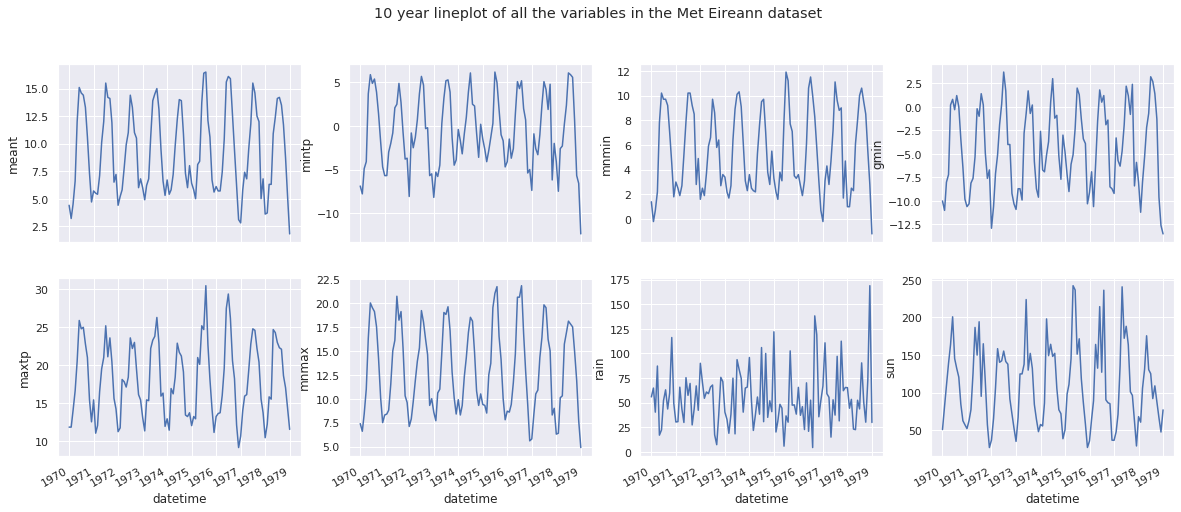

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
# The next two lines were suggested by python to get rid of a future warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style="darkgrid")
ts = df['1970-01-01':'1979-01-01'] # 120 months

fig, axes = plt.subplots(2,4,figsize=(20,8)) # make 8 subplots (4x2) with increased figure size
sns.lineplot(x='datetime',y="meant",data=ts,ax=axes[0,0])
sns.lineplot(x='datetime',y="maxtp",data=ts,ax=axes[1,0])
sns.lineplot(x='datetime',y="mintp",data=ts,ax=axes[0,1])
sns.lineplot(x='datetime',y="mnmax",data=ts,ax=axes[1,1])
sns.lineplot(x='datetime',y="mnmin",data=ts,ax=axes[0,2])
sns.lineplot(x='datetime',y="rain",data=ts,ax=axes[1,2])
sns.lineplot(x='datetime',y="gmin",data=ts,ax=axes[0,3])
sns.lineplot(x='datetime',y="sun",data=ts,ax=axes[1,3])

# Adapted from https://stackoverflow.com/a/31262531
axes[0,0].xaxis.set_major_locator(mdates.AutoDateLocator()) # Decides where to put the dates
axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Decides how to format the dates
plt.suptitle('10 year lineplot of all the variables in the Met Eireann dataset') # Add a figure super-title
fig.autofmt_xdate(); # formats the date so that the labels are at an angle so they dont overlap.

On visual inspection, the variables meant, maxtp, mintp, mnmax, mnmin and gmin look very similar. The rain and sun variables stand out slightly from the rest.

Now I will do some plots of the meant, maxtp, rain and sun variables to see what their distributions look like.

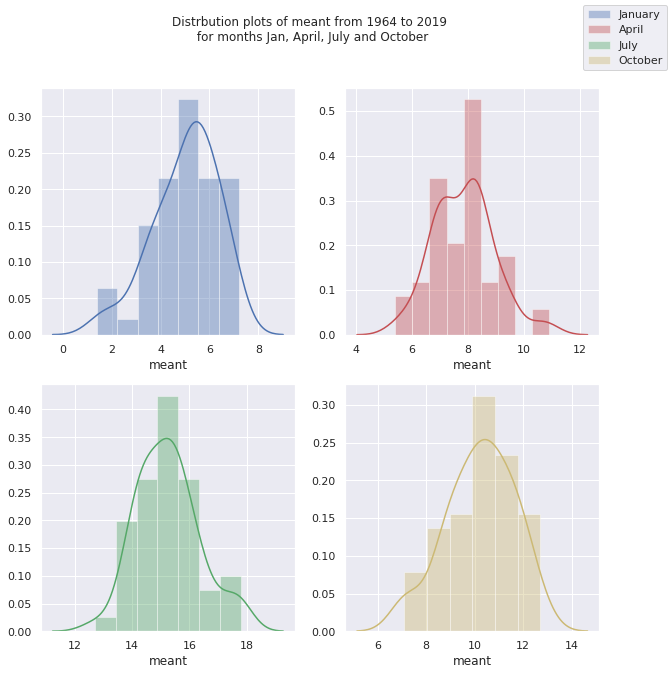

In [9]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
# Take 4 sample months and plot the distribution over the entire dataset.
p1 = df.loc[df.loc[:,'month'] == 1]['meant'] # All January data 1964-2019
p2 = df.loc[df.loc[:,'month'] == 4]['meant'] # All April data 1964-2019
p3 = df.loc[df.loc[:,'month'] == 7]['meant'] # All July data 1964-2019
p4 = df.loc[df.loc[:,'month'] == 10]['meant'] # All October data 1964-2019
# Plot the 4 months data in separate axes in a figure
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')

f.legend() # applies labels to the legend
plt.suptitle('Distrbution plots of meant from 1964 to 2019 \n for months Jan, April, July and October'); # add a super-title

This distribution also looks reasonably normal. We will try simulate with the numpy.random.normal function.

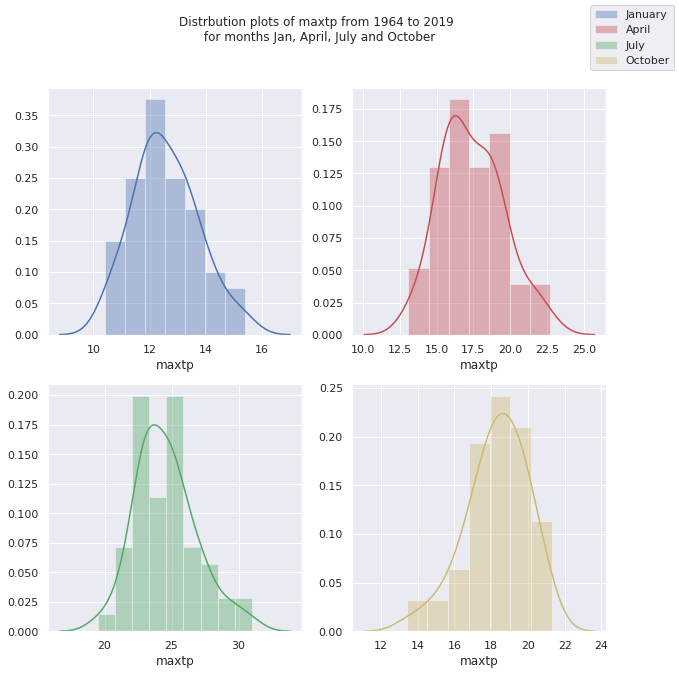

In [10]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['maxtp']
p2 = df.loc[df.loc[:,'month'] == 4]['maxtp']
p3 = df.loc[df.loc[:,'month'] == 7]['maxtp']
p4 = df.loc[df.loc[:,'month'] == 10]['maxtp']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of maxtp from 1964 to 2019 \n for months Jan, April, July and October');

Again the distribution looks reasonably normal. We will try simulate with the numpy.random.normal function.

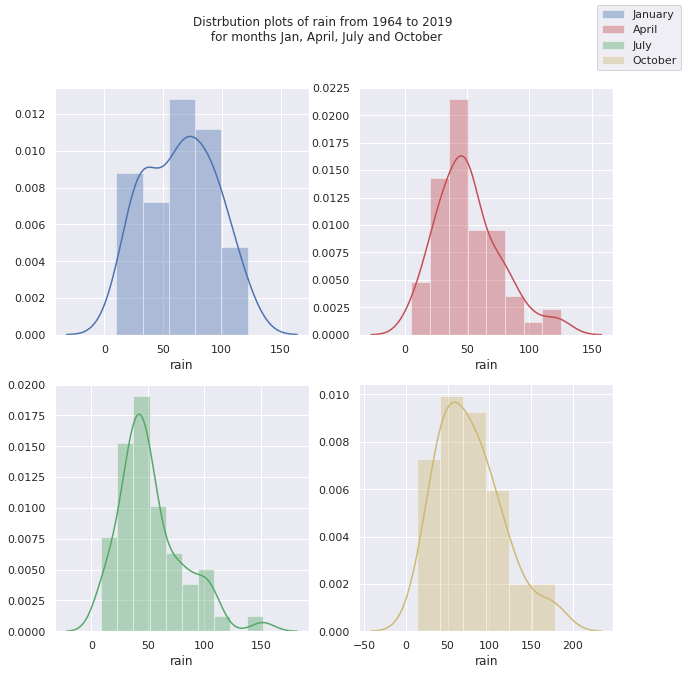

In [11]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['rain']
p2 = df.loc[df.loc[:,'month'] == 4]['rain']
p3 = df.loc[df.loc[:,'month'] == 7]['rain']
p4 = df.loc[df.loc[:,'month'] == 10]['rain']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of rain from 1964 to 2019 \n for months Jan, April, July and October');

The distribution looks reasonably normal but with a wider standard deviation. We will try simulate with the numpy.random.normal function.

We can see, in the cell below, the standard deviation for the rain variable in the months of January for the 10 year period.

In [12]:
p1.describe()

count     56.000000
mean      64.687500
std       29.740032
min       10.200000
25%       37.175000
50%       65.250000
75%       89.075000
max      121.900000
Name: rain, dtype: float64

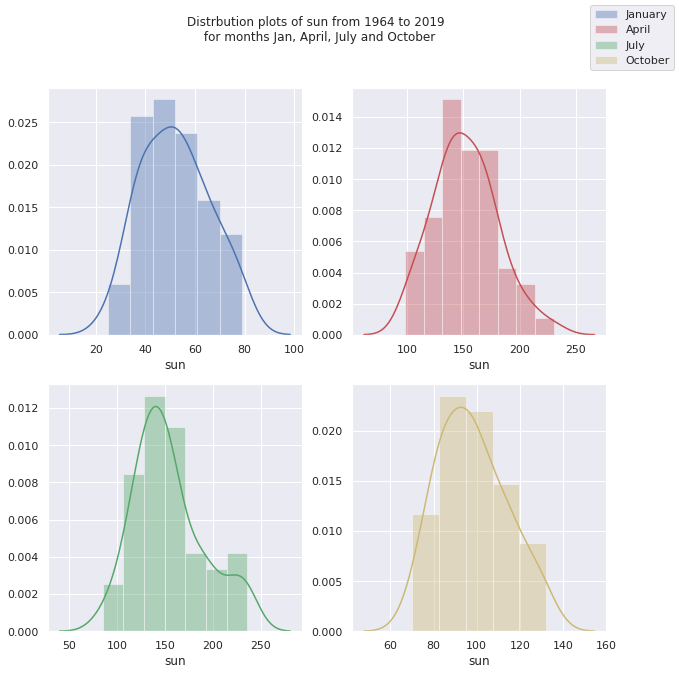

In [13]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['sun']
p2 = df.loc[df.loc[:,'month'] == 4]['sun']
p3 = df.loc[df.loc[:,'month'] == 7]['sun']
p4 = df.loc[df.loc[:,'month'] == 10]['sun']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of sun from 1964 to 2019 \n for months Jan, April, July and October');

Again, the distribution looks reasonably normal but with a wide standard deviation. We will try simulate with the numpy.random.normal function.

In the cell below, We can see the standard deviation for the sun variable in January over the 10 year period.

In [14]:
p1.describe()

count    56.00000
mean     52.13750
std      13.68073
min      24.80000
25%      41.65000
50%      51.25000
75%      61.07500
max      79.00000
Name: sun, dtype: float64

***
## Synthesizing the weather data

### Finding average values and standard deviation for each month over the entire range of the dataset

The function in the cell below will return the mean and standard deviation of a variable for each month over the 10 year period. This mean/SD  will be used to generate 100 years of simulated data. The function accepts a dataframe column as its argument and a dataframe with 100 years simulated data is returned.

In [15]:
def get_100(df_col):
    # get the mean for the variable for each month
    jan = df.loc[df.loc[:,'month'] == 1][df_col].mean()
    feb = df.loc[df.loc[:,'month'] == 2][df_col].mean()
    mar = df.loc[df.loc[:,'month'] == 3][df_col].mean()
    apr = df.loc[df.loc[:,'month'] == 4][df_col].mean()
    may = df.loc[df.loc[:,'month'] == 5][df_col].mean()
    jun = df.loc[df.loc[:,'month'] == 6][df_col].mean()
    jul = df.loc[df.loc[:,'month'] == 7][df_col].mean()
    aug = df.loc[df.loc[:,'month'] == 8][df_col].mean()
    sep = df.loc[df.loc[:,'month'] == 9][df_col].mean()
    octo = df.loc[df.loc[:,'month'] == 10][df_col].mean()
    nov = df.loc[df.loc[:,'month'] == 11][df_col].mean()
    dec = df.loc[df.loc[:,'month'] == 12][df_col].mean()
    
    # get the standard deviation for the variable for each month
    sdjan = df.loc[df.loc[:,'month'] == 1][df_col].std()
    sdfeb = df.loc[df.loc[:,'month'] == 2][df_col].std()
    sdmar = df.loc[df.loc[:,'month'] == 3][df_col].std()
    sdapr = df.loc[df.loc[:,'month'] == 4][df_col].std()
    sdmay = df.loc[df.loc[:,'month'] == 5][df_col].std()
    sdjun = df.loc[df.loc[:,'month'] == 6][df_col].std()
    sdjul = df.loc[df.loc[:,'month'] == 7][df_col].std()
    sdaug = df.loc[df.loc[:,'month'] == 8][df_col].std()
    sdsep = df.loc[df.loc[:,'month'] == 9][df_col].std()
    sdocto = df.loc[df.loc[:,'month'] == 10][df_col].std()
    sdnov = df.loc[df.loc[:,'month'] == 11][df_col].std()
    sddec = df.loc[df.loc[:,'month'] == 12][df_col].std()
    
    # Create a 100 year date range with a 1 year frequency starting from January
    rng = pd.date_range('1/1/1900', periods=100, freq='12M')
    jan_100 = pd.DataFrame(np.random.normal(jan,sdjan,100), index=rng, columns=[df_col]) # Create a DF of 100 samples from normal distribution where standard deviation is 1 and mean is the january meant

    # Create a 100 year date range with a 1 year frequency starting from February
    rng = pd.date_range('2/1/1900', periods=100, freq='12M')
    feb_100 = pd.DataFrame(np.random.normal(feb,sdfeb,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from March
    rng = pd.date_range('3/1/1900', periods=100, freq='12M')
    mar_100 = pd.DataFrame(np.random.normal(mar,sdmar,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from April
    rng = pd.date_range('4/1/1900', periods=100, freq='12M')
    apr_100 = pd.DataFrame(np.random.normal(apr,sdapr,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from May
    rng = pd.date_range('5/1/1900', periods=100, freq='12M')
    may_100 = pd.DataFrame(np.random.normal(may,sdmay,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from June
    rng = pd.date_range('6/1/1900', periods=100, freq='12M')
    jun_100 = pd.DataFrame(np.random.normal(jun,sdjun,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from July
    rng = pd.date_range('7/1/1900', periods=100, freq='12M')
    jul_100 = pd.DataFrame(np.random.normal(jul,sdjul,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from August
    rng = pd.date_range('8/1/1900', periods=100, freq='12M')
    aug_100 = pd.DataFrame(np.random.normal(aug,sdaug,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from September
    rng = pd.date_range('9/1/1900', periods=100, freq='12M')
    sept_100 = pd.DataFrame(np.random.normal(sep,sdsep,100), index=rng, columns=[df_col])

    # Create a 100 year date range with a 1 year frequency starting from October
    rng = pd.date_range('10/1/1900', periods=100, freq='12M')
    oct_100 = pd.DataFrame(np.random.normal(octo,sdocto,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from November
    rng = pd.date_range('11/1/1900', periods=100, freq='12M')
    nov_100 = pd.DataFrame(np.random.normal(nov,sdnov,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from December
    rng = pd.date_range('12/1/1900', periods=100, freq='12M')
    dec_100 = pd.DataFrame(np.random.normal(dec,sddec,100), index=rng, columns=[df_col])

    # Merge all the months into a dataframe 'results'
    result = pd.merge(jan_100,feb_100,how='outer',on=df_col,left_index=True, right_index=True) # Adapted from https://stackoverflow.com/a/36293107
    result = pd.merge(result,mar_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,apr_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,may_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,jun_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,jul_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,aug_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,sept_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,oct_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,nov_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,dec_100,how='outer',on=df_col,left_index=True, right_index=True)
    
    return result

In [16]:
# run the function to simulate 100 year data for meant
meant_100 = get_100('meant')
meant_100

,meant
1900-01-31,4.040421
1900-02-28,6.882835
1900-03-31,7.006234
1900-04-30,6.320642
1900-05-31,11.239025
...,...
1999-08-31,15.729488
1999-09-30,13.295999
1999-10-31,12.047083
1999-11-30,7.554900


#### Plotting the simulated meant data

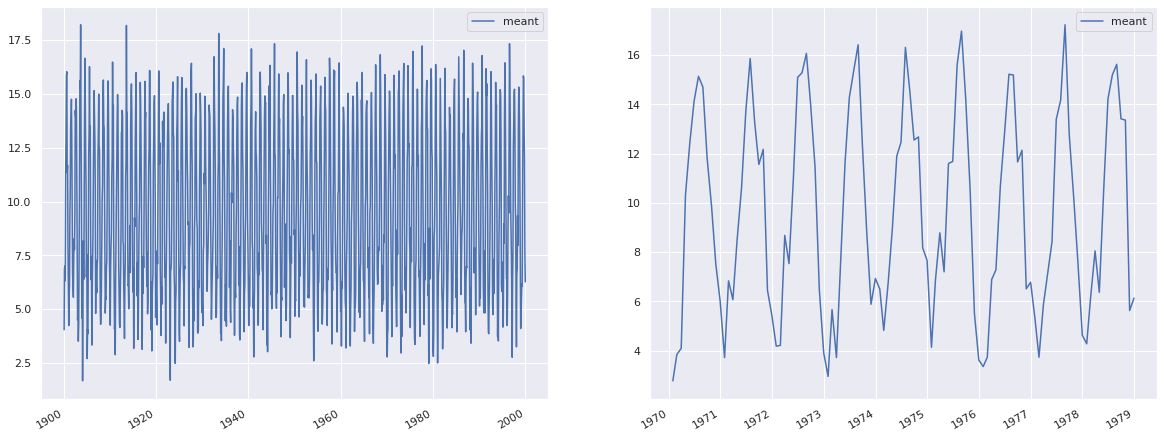

In [17]:
# Plot the results
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=meant_100,ax=axes[0])
sns.lineplot(data=meant_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

In [18]:
# synthesize the data for maxtp, mintp, mnmax and mnmin
maxtp_100 = get_100('maxtp')
mintp_100 = get_100('mintp')
mnmax_100 = get_100('mnmax')
mnmin_100 = get_100('mnmin')

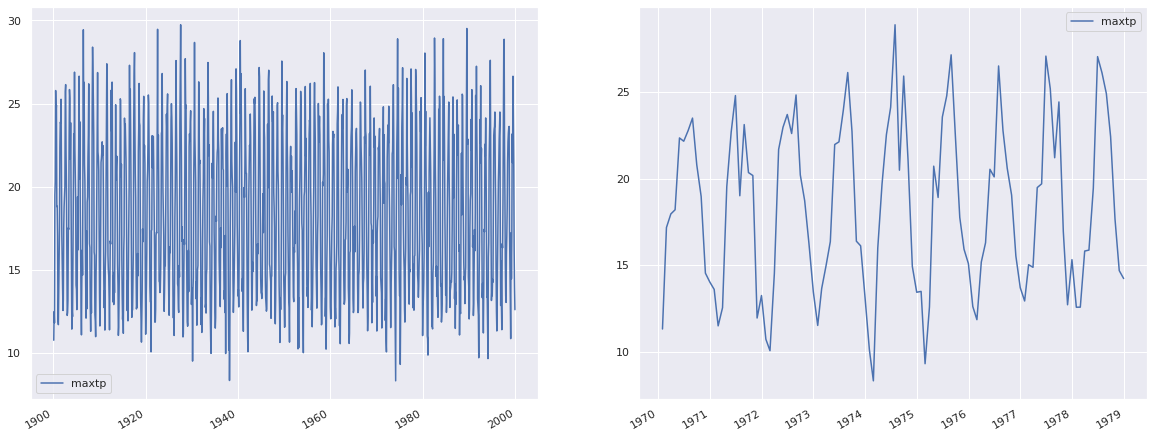

In [19]:
# Plot the results for maxtp
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=maxtp_100,ax=axes[0])
sns.lineplot(data=maxtp_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

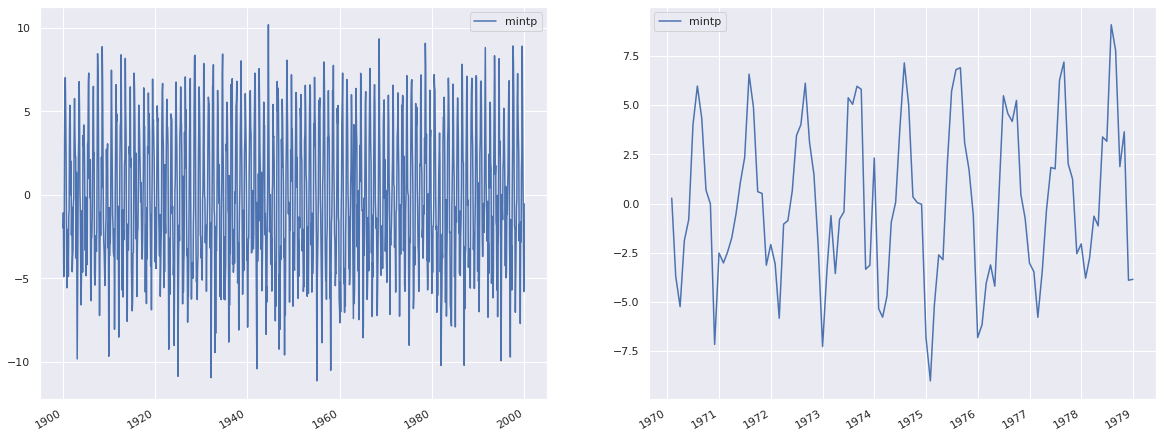

In [20]:
# Plot the results for mintp
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=mintp_100,ax=axes[0])
sns.lineplot(data=mintp_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

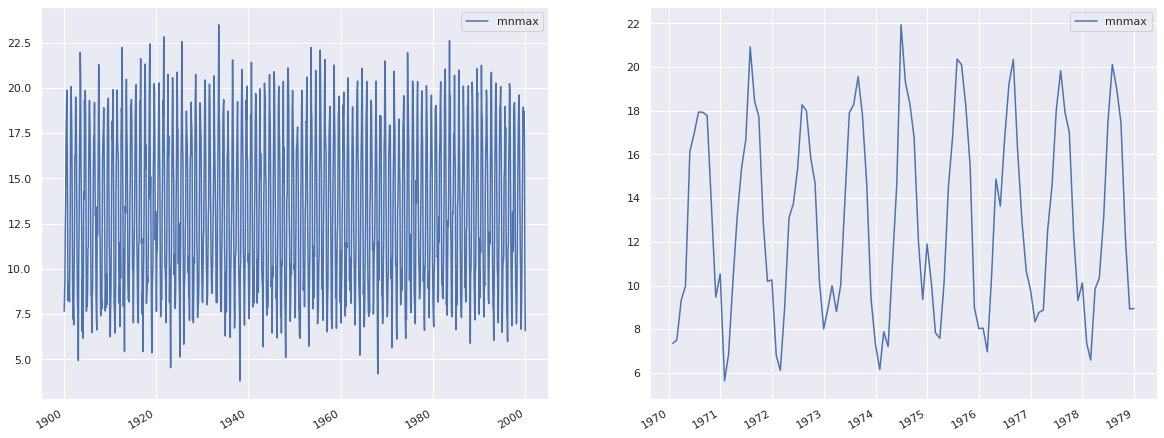

In [21]:
# Plot the results for mnmax
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=mnmax_100,ax=axes[0])
sns.lineplot(data=mnmax_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

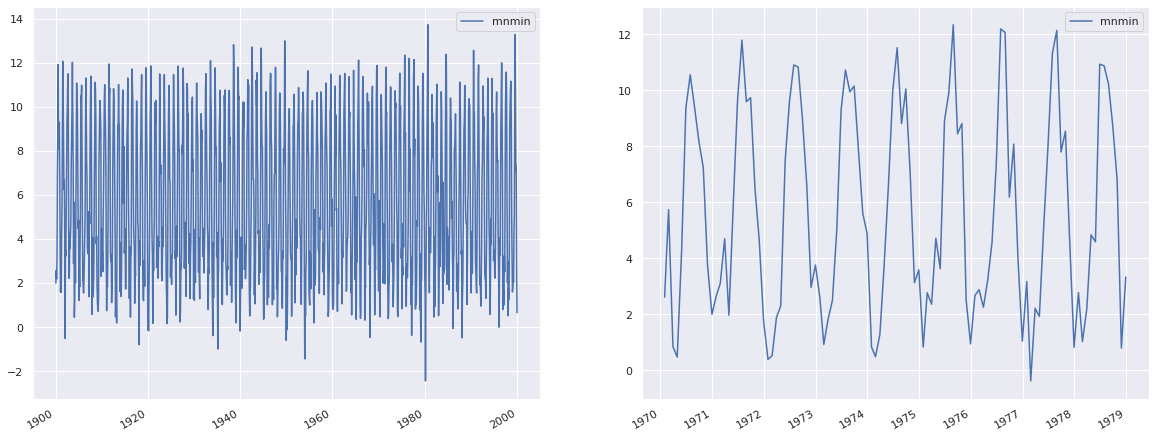

In [22]:
# Plot the results for mnmin
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=mnmin_100,ax=axes[0])
sns.lineplot(data=mnmin_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

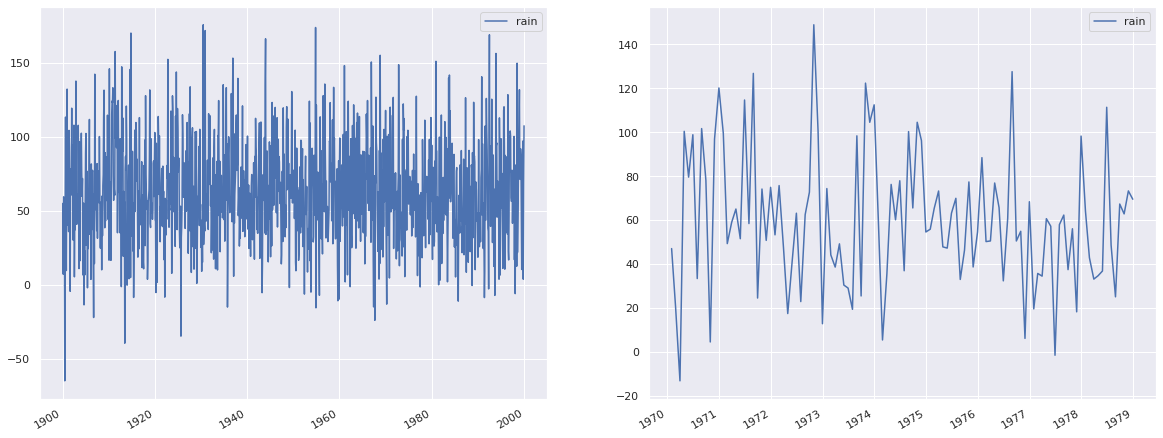

In [23]:
rain_100 = get_100('rain')
# Plot the results  for rain
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=rain_100,ax=axes[0])
sns.lineplot(data=rain_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

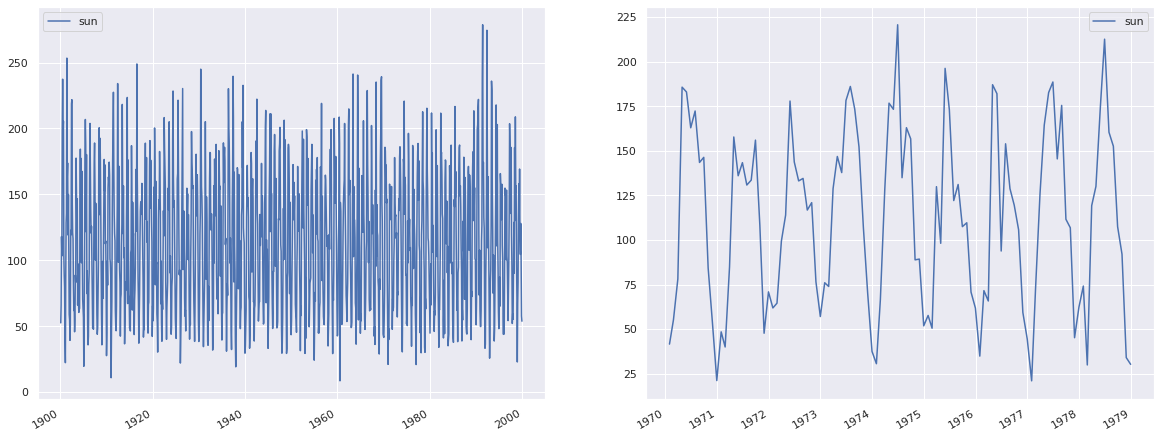

In [24]:
sun_100 = get_100('sun')
# Plot the results for sun
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=sun_100,ax=axes[0])
sns.lineplot(data=sun_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

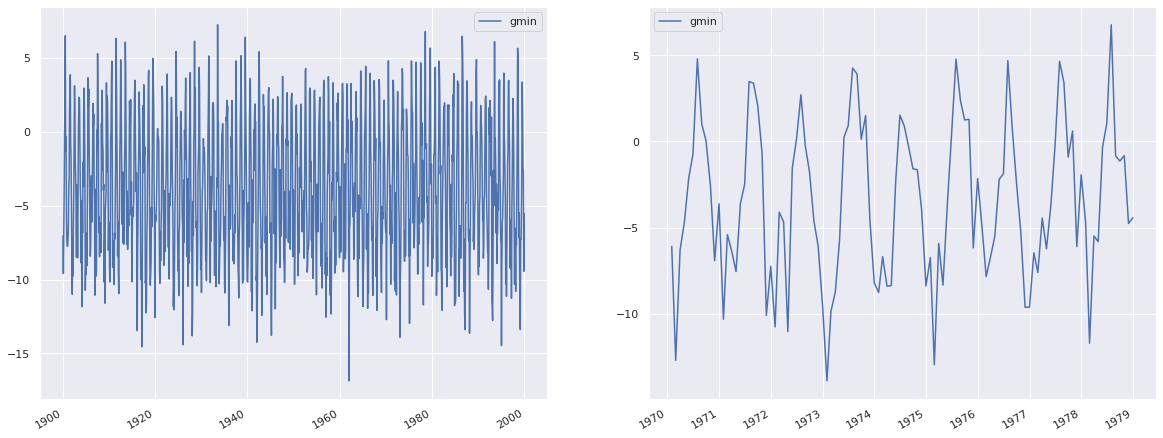

In [25]:
gmin_100 = get_100('gmin')
# Plot the results for gmin
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=gmin_100,ax=axes[0])
sns.lineplot(data=gmin_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

The resultant plots for the synthesized variables are very similar to the original plots. 

Now I will create a dataframe with 100 years of synthesized data for all the variables by merging the newly created data.

In [26]:
all_100 = pd.concat([meant_100['meant'],sun_100['sun'],rain_100['rain'], maxtp_100['maxtp'], gmin_100['gmin'], mnmax_100['mnmax'], mnmin_100['mnmin'], mintp_100['mintp'] ], axis=1, keys=['meant', 'sun', 'rain', 'maxtp','gmin', 'mnmax', 'mnmin', 'mintp']) # Concatanate all the variables into a new DF
pd.set_option('display.max_rows',1200) # Verbatim from https://stackoverflow.com/a/54655994,Allow display of 1200 rows, so output can be scrolled.  
all_100

,meant,sun,rain,maxtp,gmin,mnmax,mnmin,mintp
1900-01-31,4.040421,52.576512,55.068299,10.759976,-7.031432,7.654065,2.003926,-1.977884
1900-02-28,6.882835,66.015578,7.139135,12.474550,-9.586509,8.307433,2.583607,-1.069097
1900-03-31,7.006234,117.981886,59.511012,11.808573,-7.194827,9.302853,2.195071,-4.901775
1900-04-30,6.320642,103.382390,58.340932,19.515671,-4.236230,12.111054,3.183802,-3.105475
1900-05-31,11.239025,199.768399,25.086045,20.280401,-0.236447,13.573467,7.138460,3.281214
1900-06-30,12.938210,237.386329,-65.061552,25.781177,1.571485,16.956137,8.693738,6.194603
1900-07-31,15.835246,199.779497,50.958713,24.492815,6.489565,18.243038,11.917878,7.028052
1900-08-31,16.035623,205.475474,113.491730,24.908542,-1.308758,19.869758,8.526924,5.179771
1900-09-30,11.361596,104.536637,38.911172,18.802635,-0.343659,17.008776,8.090435,2.353519
1900-10-31,11.689206,89.412197,9.626150,18.819819,-5.862889,13.209273,9.303304,-1.647850


## Using the sythesized data to model occurences of motorcycle collisions

It is well known that motorcycle accidents occur more frequently in bad weather, particularly in rainy conditions. This is due to many factors such as bad visibility, standing water, lack of traction and increased braking distances [[2]](#References). After long spells without rain, a rain shower can bring oil to the surface of the road causing slippery conditions.

I will create a new dataset with 10 years of synthesized rain data and will add synthesized motorcycle collision data to this dataset.

In [27]:
rain_10y = rain_100['1989-01-01':'1999-01-01'] # 10 year slice of rain data
rain_mean = rain_10y.mean() # Find the average
rain_mean[0]

62.955114536375795

I will create a column in the rain dataframe to represent the number of motorcycle collisions per month. This will vary depending on the amount of rain in the month. Poisson distribution will be used to model the number of collisions based on the mean precipitation for the month. The poisson distribution is a good fit for this synthesis because the time between collisions is random, so one collision during a period of time, has no bearing on the probability of another one happening. 

For this synthesis, higher than average precipitation will result in higher expected values (lamda) for the poisson distribution. Using CSO statistics for Dublin 2012 [[3]](#References), there were 1527 collisions in 2012. I will assume 25%  (379) were motorcycles, roughly 32 per month.

I will count the number of days with above/below average rainfall and then assign the number of collisions with a lower poisson expected value for below average days and a higher poisson expected value for above average days. 

The number of collisions will be assigned to a new dataframe column for motorcycle collisions per month 'motorcycle_pm'.

In [28]:
c = rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','rain'] <= rain_mean[0]]['rain'].count() # count the number of days under average rainfall
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','rain'] <= rain_mean[0], 'motorcycle_pm'] = np.random.poisson(23,c) # assign a random number of collisions
c = rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','rain'] > rain_mean[0]]['rain'].count() # count the number of days over average rainfall
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','rain'] > rain_mean[0], 'motorcycle_pm'] = np.random.poisson(37,c) # assign a random number of collisions
rain_10y.describe()

/home/aido/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/aido/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/home/aido/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

,rain,motorcycle_pm
count,120.000000,120.000000
mean,62.955115,30.133333
std,37.258036,8.643192
min,-8.697793,12.000000
25%,39.070947,24.000000
50%,58.352672,29.500000
75%,87.656457,36.000000
max,169.227091,55.000000


In [29]:
pd.set_option('display.max_rows',120)
rain_10y

,rain,motorcycle_pm
1989-01-31,123.524767,34.0
1989-02-28,85.491786,38.0
1989-03-31,87.266178,38.0
1989-04-30,83.067011,34.0
1989-05-31,10.189781,23.0
1989-06-30,33.074963,19.0
1989-07-31,69.543518,44.0
1989-08-31,64.074541,41.0
1989-09-30,44.828088,12.0
1989-10-31,42.905297,27.0


Below is a plot of the rain and motorcycle_pm variables and a plot of rain vs. motorcycle_pm with a linear regression.

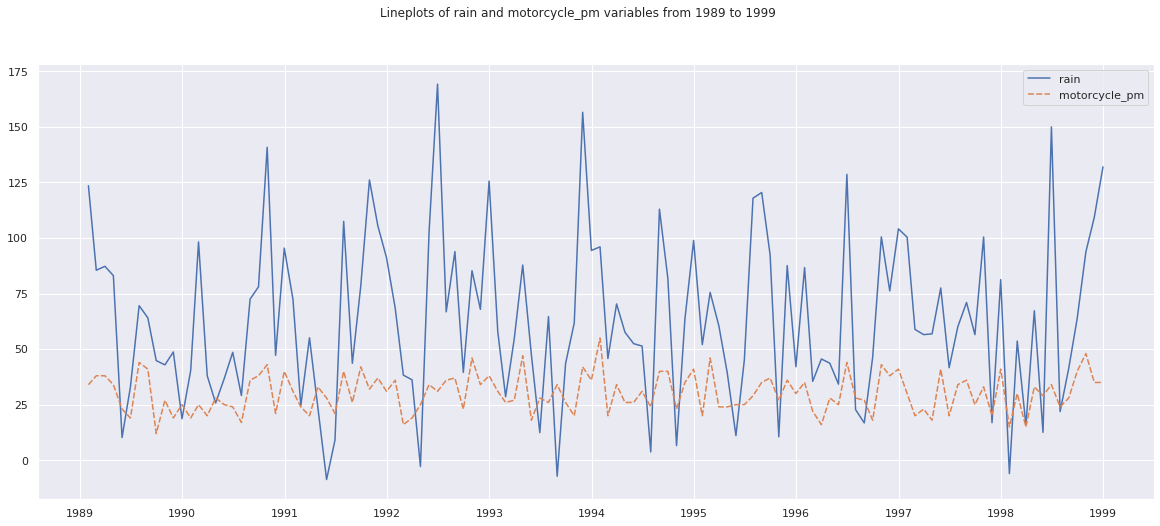

In [30]:
fig = plt.subplots(figsize=(20,8)) # increase the figure size
sns.lineplot(data=rain_10y); # lineplot of the rain_10 dataframe
plt.suptitle('Lineplots of rain and motorcycle_pm variables from 1989 to 1999');

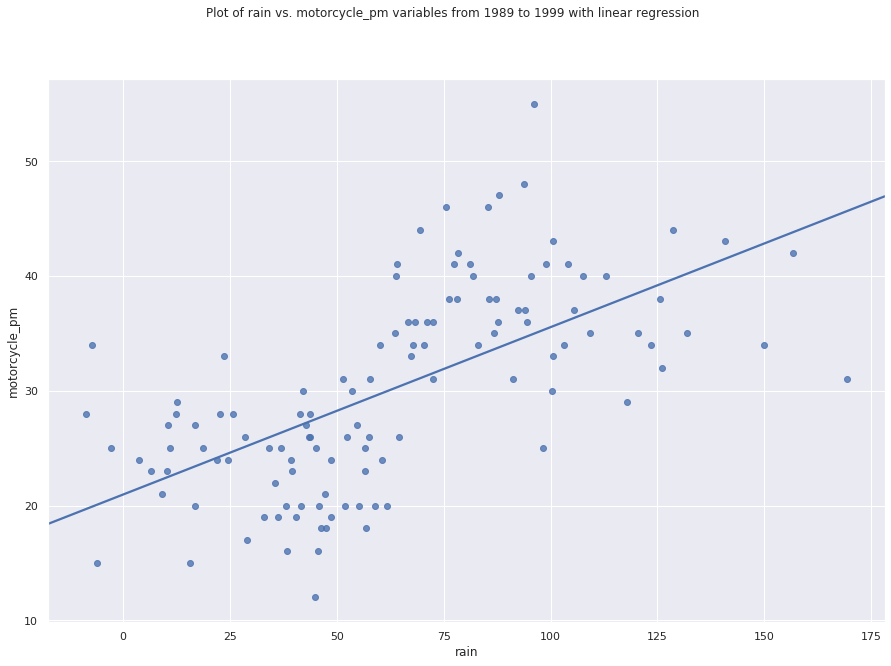

In [31]:
fig = plt.subplots(figsize=(15,10))
sns.regplot(x="rain",y="motorcycle_pm",data=rain_10y,fit_reg=True,ci=None); # Seaborn data and linear regression model fit of motorcycle_pm and rain.
plt.suptitle('Plot of rain vs. motorcycle_pm variables from 1989 to 1999 with linear regression');

Now I will add a new column to the dataset. This column will represent fatalities from the motorcycle collisions. I will work off the assumption that, although 25% of the road fatalities were from motorcycle collisions, 40% of fatalities come from motorcycle collisions. According to the CSO figures, there were 11 fatalities in Dublin in 2012, giving 4.4 (40% of 11) motorcycle fatalities, with an average 0.36 fatalities per month.

A poisson distribution is used again as it is suitable because of the random time between events.

In [32]:
rain_10y['fatalities'] = np.random.poisson(0.36,120) # make a new column for fatalities with expected value 0.36, 120 samples.
pd.set_option('display.max_rows',120)
rain_10y

/home/aido/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rain,motorcycle_pm,fatalities
1989-01-31,123.524767,34.0,1
1989-02-28,85.491786,38.0,1
1989-03-31,87.266178,38.0,1
1989-04-30,83.067011,34.0,1
1989-05-31,10.189781,23.0,0
1989-06-30,33.074963,19.0,2
1989-07-31,69.543518,44.0,0
1989-08-31,64.074541,41.0,0
1989-09-30,44.828088,12.0,1
1989-10-31,42.905297,27.0,0


Now I will add three columns to represent the time interval of the first, second, third and fourth fatality. There will be three time intervals, 00:00-07:59, 08:00 - 15:59 and 16:00 - 23:59. I will use random choice with the time interval 08:00 - 15:59  having the lowest probability. [[4]](#References)

In [33]:
# Make 3 new column (Collision Time ) to represent number of fatal collisions between 3 time intervals.
c = rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 1]['fatalities'].count() # Count number of single fatality months

rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 1, '1st Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign an interval using random choice
c = rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 2]['fatalities'].count()  #Count number of double fatality months
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 2, '1st Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign an interval using random choice
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 2, '2nd Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign a second interval using random choice
c = rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 3]['fatalities'].count()
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 3, '1st Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign an interval using random choice
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 3, '2nd Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign a second interval using random choice
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 3, '3rd Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4])# Assign a third interval using random choice

c = rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 4]['fatalities'].count()
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 4, '1st Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign an interval using random choice
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 4, '2nd Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign a second interval using random choice
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 4, '3rd Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign a third  interval using random choice
rain_10y.loc[rain_10y.loc['1989-01-31':'1998-12-31','fatalities'] == 4, '4th Fatality Time Interval'] = np.random.choice(3,c,p=[0.4,0.2,0.4]) # Assign a fourth interval using random choice

pd.set_option('display.max_rows',120) # Verbatim from https://stackoverflow.com/a/54655994. Allows viewing of 120 rows.
rain_10y # Display the new created DF


/home/aido/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,rain,motorcycle_pm,fatalities,1st Fatality Time Interval,2nd Fatality Time Interval,3rd Fatality Time Interval,4th Fatality Time Interval
1989-01-31,123.524767,34.0,1,2.0,NaN,NaN,NaN
1989-02-28,85.491786,38.0,1,0.0,NaN,NaN,NaN
1989-03-31,87.266178,38.0,1,0.0,NaN,NaN,NaN
1989-04-30,83.067011,34.0,1,2.0,NaN,NaN,NaN
1989-05-31,10.189781,23.0,0,NaN,NaN,NaN,NaN
1989-06-30,33.074963,19.0,2,0.0,2.0,NaN,NaN
1989-07-31,69.543518,44.0,0,NaN,NaN,NaN,NaN
1989-08-31,64.074541,41.0,0,NaN,NaN,NaN,NaN
1989-09-30,44.828088,12.0,1,1.0,NaN,NaN,NaN
1989-10-31,42.905297,27.0,0,NaN,NaN,NaN,NaN


***
## References
[1] [Met Eireann. Historical Data (Online)](https://cli.fusio.net/cli/climate_data/webdata/mly3723.zip) Accessed November 7th, 2019.

[2] [Dolman Law Group, August 24th 2015. Motorcycle Accidents in Excess Rain (Online)](https://www.dolmanlaw.com/motorcycle-accidents-excess-rain/) Accessed 4th December 2019.

[3] [Central Statistics Office. ROA20: Traffic Collisions and Casualties by County, Year and Statistic (Onlince)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=ROA20&TabStrip=Select&PLanguage=0&FF=1) Accessed 4th December 2019.

[4] [Carl O'Brien, The Irish Times. Crash Report (Online)](https://www.irishtimes.com/news/environment/crash-report) Accessed 4th December 2019.



# End
***